# 1. Project: Visual Data Analysis

This is an exercise on the reproduction of Hans Rosling’s famous animation. It takes several pandas, matplotlib and seaborn skills in order to apply them to an epic data visualization / storytelling task.

Here’s the rough idea:

1. Read in data from multiple sources:

     **worldwide fertility rate data**

     **worldwide life expectancy data**

     **worldwide population data**
      

2. Merge all the data into a single DataFrame.

3. Generate a scatterplot for a single year.

4. Combine images of scatterplots of all years to make an animation / gif.


In [1]:
import pandas as pd
import numpy as pn

# Load the datasets

Load the file data/gapminder_total_fertility.csv into pandas.

In [2]:
fert = pd.read_csv("gapminder_total_fertility.csv", index_col = 0)

Inspect the 5 first rows of the dataframe and its shape.

In [3]:
print(fert.head())

                       1800  1801  1802  1803  1804  1805  1806  1807  1808  \
Total fertility rate                                                          
Abkhazia                NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Afghanistan            7.00  7.00  7.00  7.00  7.00  7.00  7.00  7.00  7.00   
Akrotiri and Dhekelia   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Albania                4.60  4.60  4.60  4.60  4.60  4.60  4.60  4.60  4.60   
Algeria                6.99  6.99  6.99  6.99  6.99  6.99  6.99  6.99  6.99   

                       1809  ...  2006  2007  2008  2009  2010  2011  2012  \
Total fertility rate         ...                                             
Abkhazia                NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Afghanistan            7.00  ...  6.70  6.46  6.20  5.93  5.66  5.40  5.14   
Akrotiri and Dhekelia   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Albania                4.60  ...  1.85  1.80  1.76  1.74

In [4]:
print(fert.shape)

(260, 216)


Proceed in the same way with the file data/gapminder_lifeexpectancy.xlsx.
Save it in a DataFrame with the name life. 


In [5]:
life = pd.read_excel("gapminder_lifeexpectancy.xlsx", index_col = 0)


Inspect the 5 first rows of the dataframe and its shape.

In [6]:
print(life.head())

                        1800   1801   1802   1803   1804   1805   1806   1807  \
Life expectancy                                                                 
Abkhazia                 NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Afghanistan            28.21  28.20  28.19  28.18  28.17  28.16  28.15  28.14   
Akrotiri and Dhekelia    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Albania                35.40  35.40  35.40  35.40  35.40  35.40  35.40  35.40   
Algeria                28.82  28.82  28.82  28.82  28.82  28.82  28.82  28.82   

                        1808   1809  ...  2007  2008  2009  2010  2011  2012  \
Life expectancy                      ...                                       
Abkhazia                 NaN    NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
Afghanistan            28.13  28.12  ...  52.4  52.8  53.3  53.6  54.0  54.4   
Akrotiri and Dhekelia    NaN    NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
Albania                35.40  35

In [7]:
print(life.shape)

(260, 217)


# Inspect and adjust the columns of tables

Take a look at the columns of both tables.

In [8]:
print(fert.columns)

Index(['1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808',
       '1809',
       ...
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015'],
      dtype='object', length=216)


In [9]:
print(life.columns)

Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', length=217)


One table has columns as strings, the other has integer numbers. To merge the tables, we need to convert both into the same format.

In [10]:
fert.columns = fert.columns.astype(int)

Check with fert.columns whether the transformation was successful.

In [11]:
fert.columns

Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
           dtype='int64', length=216)

In [12]:
life.columns

Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', length=217)

# Inspect and adjust the rows of fert table

Now, let’s check the row index of the table.

In [13]:
fert.index

Index(['Abkhazia', 'Afghanistan', 'Akrotiri and Dhekelia', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda',
       ...
       'Vietnam', 'Virgin Islands (U.S.)', 'North Yemen (former)',
       'South Yemen (former)', 'Yemen', 'Yugoslavia', 'Zambia', 'Zimbabwe',
       'Åland', 'Åland'],
      dtype='object', name='Total fertility rate', length=260)

The name of the index should be called Country.

In [14]:
fert.index.name = "Country"

In [15]:
fert.index

Index(['Abkhazia', 'Afghanistan', 'Akrotiri and Dhekelia', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda',
       ...
       'Vietnam', 'Virgin Islands (U.S.)', 'North Yemen (former)',
       'South Yemen (former)', 'Yemen', 'Yugoslavia', 'Zambia', 'Zimbabwe',
       'Åland', 'Åland'],
      dtype='object', name='Country', length=260)

# Convert fert table into long format

Now convert the table into long format. First, we have to move the row index into a column.

In [16]:
fert = fert.reset_index()

Second, we use the convenient melt function for the conversion.

In [17]:
fert = fert.melt(id_vars = "Country", var_name = "year", value_name = "fertility_rate")

In [18]:
fert

,Country,year,fertility_rate
0,Abkhazia,1800,NaN
1,Afghanistan,1800,7.00
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,4.60
4,Algeria,1800,6.99
...,...,...,...
56155,Yugoslavia,2015,NaN
56156,Zambia,2015,5.59
56157,Zimbabwe,2015,3.35
56158,Åland,2015,NaN


# Inspect and adjust the rows of life table

Repeat the steps for the life expectancy dataset, so that it’s also in long format.

In [19]:
life.index

Index(['Abkhazia', 'Afghanistan', 'Akrotiri and Dhekelia', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda',
       ...
       'Vietnam', 'Virgin Islands (U.S.)', 'North Yemen (former)',
       'South Yemen (former)', 'Yemen', 'Yugoslavia', 'Zambia', 'Zimbabwe',
       'Åland', 'South Sudan'],
      dtype='object', name='Life expectancy', length=260)

In [20]:
life.index.name = "Country"

# Convert life table into long format

In [21]:
life = life.reset_index()

In [22]:
life = life.melt(id_vars = "Country", var_name = "year", value_name = "life_expectancy")

In [23]:
life

,Country,year,life_expectancy
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.21
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,35.40
4,Algeria,1800,28.82
...,...,...,...
56415,Yugoslavia,2016,NaN
56416,Zambia,2016,57.10
56417,Zimbabwe,2016,61.69
56418,Åland,2016,NaN


# Load the population dataset (inspect, adjust and convert into long format)

To make things even more interesting, let’s also introduce population data from the file data/gapminder_population.xlsx.

Read the data in with pandas, and get that DataFrame into the same format as the other two.

In [24]:
pop = pd.read_excel("gapminder_population.xlsx", nrows=260, index_col = 0)

In [25]:
print(pop.head())

                            1800       1810       1820       1830       1840  \
Total population                                                               
Abkhazia                     NaN        NaN        NaN        NaN        NaN   
Afghanistan            3280000.0  3280000.0  3323519.0  3448982.0  3625022.0   
Akrotiri and Dhekelia        NaN        NaN        NaN        NaN        NaN   
Albania                 410445.0   423591.0   438671.0   457234.0   478227.0   
Algeria                2503218.0  2595056.0  2713079.0  2880355.0  3082721.0   

                            1850       1860       1870       1880       1890  \
Total population                                                               
Abkhazia                     NaN        NaN        NaN        NaN        NaN   
Afghanistan            3810047.0  3973968.0  4169690.0  4419695.0  4710171.0   
Akrotiri and Dhekelia        NaN        NaN        NaN        NaN        NaN   
Albania                 506889.0   5528

In [26]:
pop.shape

(260, 81)

In [27]:
pop.columns

Int64Index([1800, 1810, 1820, 1830, 1840, 1850, 1860, 1870, 1880, 1890, 1900,
            1910, 1920, 1930, 1940, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
            1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
            1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
            1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
            1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
            2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014, 2015],
           dtype='int64')

In [28]:
pop.index

Index(['Abkhazia', 'Afghanistan', 'Akrotiri and Dhekelia', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda',
       ...
       'Vietnam', 'Virgin Islands (U.S.)', 'North Yemen (former)',
       'South Yemen (former)', 'Yemen', 'Yugoslavia', 'Zambia', 'Zimbabwe',
       'Åland', 'South Sudan'],
      dtype='object', name='Total population', length=260)

In [29]:
pop

,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Total population,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,3280000.0,3280000.0,3323519.0,3448982.0,3625022.0,3810047.0,3973968.0,4169690.0,4419695.0,4710171.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15700.0,15700.0,15700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,410445.0,423591.0,438671.0,457234.0,478227.0,506889.0,552800.0,610036.0,672544.0,741688.0,...,3050741.0,3010849.0,2968026.0,2929886.0,2901883.0,2886010.0,2880667.0,2883281.0,2889676.0,2896679.0
Algeria,2503218.0,2595056.0,2713079.0,2880355.0,3082721.0,3299305.0,3536468.0,3811028.0,4143163.0,4525691.0,...,33749328.0,34261971.0,34811059.0,35401790.0,36036159.0,36717132.0,37439427.0,38186135.0,38934334.0,39666519.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yugoslavia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23887171.0,23946096.0,23988543.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zambia,747000.0,747000.0,747000.0,747000.0,747000.0,747000.0,746052.0,745105.0,744157.0,743210.0,...,12381509.0,12738676.0,13114579.0,13507849.0,13917439.0,14343526.0,14786581.0,15246086.0,15721343.0,16211767.0
Zimbabwe,1085814.0,1085814.0,1106634.0,1167259.0,1253642.0,1346417.0,1444385.0,1549480.0,1661683.0,1781947.0,...,13127942.0,13297798.0,13495462.0,13720997.0,13973897.0,14255592.0,14565482.0,14898092.0,15245855.0,15602751.0


In [30]:
pop.index.name = "Country"

In [31]:
pop = pop.reset_index()

In [32]:
pop

,Country,1800,1810,1820,1830,1840,1850,1860,1870,1880,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,3280000.0,3280000.0,3323519.0,3448982.0,3625022.0,3810047.0,3973968.0,4169690.0,4419695.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15700.0,15700.0,15700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,410445.0,423591.0,438671.0,457234.0,478227.0,506889.0,552800.0,610036.0,672544.0,...,3050741.0,3010849.0,2968026.0,2929886.0,2901883.0,2886010.0,2880667.0,2883281.0,2889676.0,2896679.0
4,Algeria,2503218.0,2595056.0,2713079.0,2880355.0,3082721.0,3299305.0,3536468.0,3811028.0,4143163.0,...,33749328.0,34261971.0,34811059.0,35401790.0,36036159.0,36717132.0,37439427.0,38186135.0,38934334.0,39666519.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Yugoslavia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23887171.0,23946096.0,23988543.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256,Zambia,747000.0,747000.0,747000.0,747000.0,747000.0,747000.0,746052.0,745105.0,744157.0,...,12381509.0,12738676.0,13114579.0,13507849.0,13917439.0,14343526.0,14786581.0,15246086.0,15721343.0,16211767.0
257,Zimbabwe,1085814.0,1085814.0,1106634.0,1167259.0,1253642.0,1346417.0,1444385.0,1549480.0,1661683.0,...,13127942.0,13297798.0,13495462.0,13720997.0,13973897.0,14255592.0,14565482.0,14898092.0,15245855.0,15602751.0
258,Åland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26923.0,26923.0,26923.0,26923.0,26923.0,NaN,NaN,NaN,NaN,NaN


In [33]:
pop = pop.melt(id_vars = "Country", var_name = "year", value_name = "Total population")

In [34]:
pop


,Country,year,Total population
0,Abkhazia,1800,NaN
1,Afghanistan,1800,3280000.0
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,410445.0
4,Algeria,1800,2503218.0
...,...,...,...
21055,Yugoslavia,2015,NaN
21056,Zambia,2015,16211767.0
21057,Zimbabwe,2015,15602751.0
21058,Åland,2015,NaN


In [35]:
#fert #to check again the table before merge

# Merging the tables

Now we can start gluing the DataFrames together. This works great with the merge function.

In [36]:
fert_pop = fert.merge(pop)

In [37]:
fert_pop

,Country,year,fertility_rate,Total population
0,Abkhazia,1800,NaN,NaN
1,Afghanistan,1800,7.00,3280000.0
2,Akrotiri and Dhekelia,1800,NaN,NaN
3,Albania,1800,4.60,410445.0
4,Algeria,1800,6.99,2503218.0
...,...,...,...,...
20974,Yugoslavia,2015,NaN,NaN
20975,Zambia,2015,5.59,16211767.0
20976,Zimbabwe,2015,3.35,15602751.0
20977,Åland,2015,NaN,NaN


Do a second merge (with the life expectancy data) so that in the end you have all the data in a single DataFrame.

In [38]:
life

,Country,year,life_expectancy
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.21
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,35.40
4,Algeria,1800,28.82
...,...,...,...
56415,Yugoslavia,2016,NaN
56416,Zambia,2016,57.10
56417,Zimbabwe,2016,61.69
56418,Åland,2016,NaN


In [39]:
fert_pop_life = fert_pop.merge(life)

(Alternatively uncomment and try the following code.)

In [40]:
#fert_pop_life = pd.merge(life, fert_pop, how= "inner", on = ["country", "year"])

In [41]:
fert_pop_life

,Country,year,fertility_rate,Total population,life_expectancy
0,Abkhazia,1800,NaN,NaN,NaN
1,Afghanistan,1800,7.00,3280000.0,28.21
2,Akrotiri and Dhekelia,1800,NaN,NaN,NaN
3,Albania,1800,4.60,410445.0,35.40
4,Algeria,1800,6.99,2503218.0,28.82
...,...,...,...,...,...
20974,Yugoslavia,2015,NaN,NaN,NaN
20975,Zambia,2015,5.59,16211767.0,56.70
20976,Zimbabwe,2015,3.35,15602751.0,59.30
20977,Åland,2015,NaN,NaN,NaN


# Merge the continents table with the final DataFrame

Load the continents.csv file.

In [42]:
continents = pd.read_csv("continents.csv", sep = ";")

In [43]:
print(continents.head())

  continent   country
0    Africa   Algeria
1    Africa    Angola
2    Africa     Benin
3    Africa  Botswana
4    Africa   Burkina


In [44]:
continents.shape

(194, 2)

Rename continents' columns.

In [45]:
continents.rename(columns = {"continent": "Continent", "country": "Country"}, inplace = True)

In [46]:
continents

,Continent,Country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina
...,...,...
189,South America,Paraguay
190,South America,Peru
191,South America,Suriname
192,South America,Uruguay


Merge continents with the fert_pop_life table.

In [47]:
fert_pop_life_cont = pd.merge(continents, fert_pop_life, how = "left", on = "Country")

In [48]:
fert_pop_life_cont

,Continent,Country,year,fertility_rate,Total population,life_expectancy
0,Africa,Algeria,1800,6.99,2503218.0,28.82
1,Africa,Algeria,1810,6.99,2595056.0,28.82
2,Africa,Algeria,1820,6.99,2713079.0,28.82
3,Africa,Algeria,1830,6.99,2880355.0,28.82
4,Africa,Algeria,1840,6.99,3082721.0,28.82
...,...,...,...,...,...,...
14189,South America,Venezuela,2011,2.44,29427631.0,74.80
14190,South America,Venezuela,2012,2.42,29854238.0,74.60
14191,South America,Venezuela,2013,2.39,30276045.0,74.70
14192,South America,Venezuela,2014,2.36,30693827.0,74.80


In [49]:
fert_pop_life_cont.shape

(14194, 6)

# Scatterplots 

With all the data merged into a single object, you can now select specific columns and plot them. 
First of all, import seaborn and matplotlib.

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

### Create a scatterplot for a subset of the dataframe *e.g.* for the year 2015.

In [51]:
fert_pop_life_cont_2015 = fert_pop_life_cont.loc[fert_pop_life_cont["year"]== 2015]

In [52]:
fert_pop_life_cont_2015

,Continent,Country,year,fertility_rate,Total population,life_expectancy
80,Africa,Algeria,2015,2.71,39666519.0,76.4
161,Africa,Angola,2015,5.65,25021974.0,59.6
242,Africa,Benin,2015,4.69,10879829.0,62.3
323,Africa,Botswana,2015,2.54,2262485.0,58.7
405,Africa,Burundi,2015,5.85,11178921.0,61.4
...,...,...,...,...,...,...
13869,South America,Paraguay,2015,2.80,6639123.0,74.4
13950,South America,Peru,2015,2.36,31376670.0,79.5
14031,South America,Suriname,2015,2.22,542975.0,72.0
14112,South America,Uruguay,2015,2.03,3431555.0,76.8


Assigning to a variable the colour palette and setting the grid to be used for the scatterplot.

In [53]:
palette = sns.color_palette("icefire")
sns.set_theme(style="darkgrid")

Note: Add another dimension to the visualization by utilizing the population data, so that the size of the symbols represent the population from the gapminder dataset.

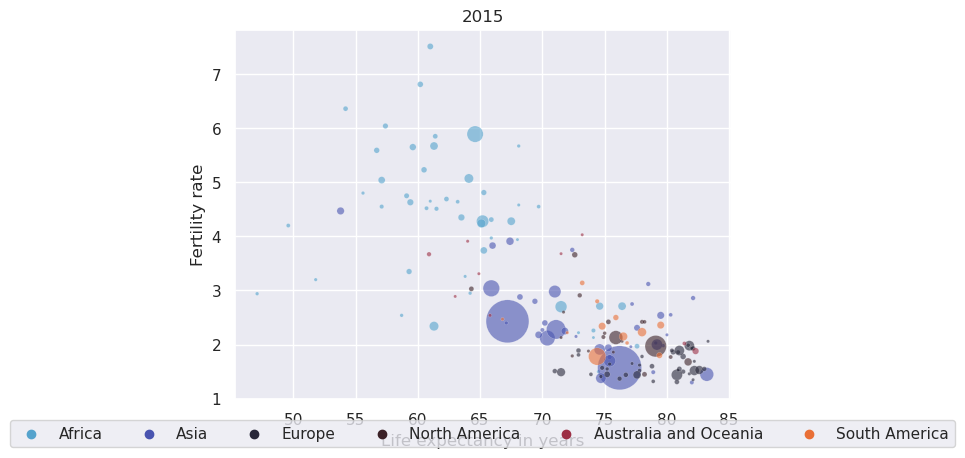

In [54]:
ax = sns.scatterplot(x= fert_pop_life_cont_2015["life_expectancy"], y= fert_pop_life_cont_2015["fertility_rate"], 
                     hue = fert_pop_life_cont_2015["Continent"], size = fert_pop_life_cont_2015["Total population"],
                     data= fert_pop_life_cont_2015, alpha=0.6, palette = palette, sizes = (5, 1000), 
                     size_norm = (fert_pop_life_cont_2015["Total population"].min(), fert_pop_life_cont_2015["Total population"].max()))
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[1:7],labels[1:7],loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol= 7)
sns.set(rc={'figure.figsize':(16, 9)})
plt.title("2015")
plt.xlabel("Life expectancy in years")
plt.ylabel("Fertility rate")
plt.savefig("fert_pop_life_cont_2015.png")


### Create an animated scatterplot showing the correlation between life expectancy and fertility, by creating one plot for each year between 1960 and 2015.

Before that, the data contains too many gaps. Let's start from getting rid the NaNs.

In [55]:
fert_pop_life_cont.isnull().values.any()

True

In [56]:
fert_pop_life_cont.isnull().sum().sum()

1456

In [57]:
fert_pop_life_cont.dropna(inplace = True)

In [58]:
fert_pop_life_cont.isnull().values.any()

False

In [59]:
fert_pop_life_cont

,Continent,Country,year,fertility_rate,Total population,life_expectancy
0,Africa,Algeria,1800,6.99,2503218.0,28.82
1,Africa,Algeria,1810,6.99,2595056.0,28.82
2,Africa,Algeria,1820,6.99,2713079.0,28.82
3,Africa,Algeria,1830,6.99,2880355.0,28.82
4,Africa,Algeria,1840,6.99,3082721.0,28.82
...,...,...,...,...,...,...
14189,South America,Venezuela,2011,2.44,29427631.0,74.80
14190,South America,Venezuela,2012,2.42,29854238.0,74.60
14191,South America,Venezuela,2013,2.39,30276045.0,74.70
14192,South America,Venezuela,2014,2.36,30693827.0,74.80


Check the min and max for fertility rate and life expectancy columns in order to use properly the function plt.axis((xmin, xmax, ymin, ymax)) to fix respectively the coordinates of the plot. 

In [60]:
fert_pop_life_cont.agg({"life_expectancy":["min", "max"], "fertility_rate":["min", "max"]})

,life_expectancy,fertility_rate
min,4.0,1.13
max,83.3,9.22


Write a for loop that iterates through each year and produces a scatterplot.

Save each scatterplot to a separate file containing the year in the filename, e.g. fert_pop_life_1999.png. After saving the plot call plt.close() to remove the plot from the notebook.

In [61]:
for year in range(1960, 2016):
    fert_pop_life_cont_subset = fert_pop_life_cont.loc[fert_pop_life_cont["year"]== year]
    cmap = sns.cubehelix_palette(light=1, as_cmap=True)
    ax2 = sns.scatterplot(x= fert_pop_life_cont_subset["life_expectancy"], y= fert_pop_life_cont_subset["fertility_rate"], 
                          hue = fert_pop_life_cont_subset["Continent"], size = fert_pop_life_cont_subset["Total population"], 
                          data= fert_pop_life_cont_subset, palette = palette, alpha= 0.6, sizes = (5, 1000), 
                          size_norm = (fert_pop_life_cont_subset["Total population"].min(), fert_pop_life_cont_subset["Total population"].max()))
    handles, labels = ax2.get_legend_handles_labels()
    plt.legend(handles[1:7],labels[1:7],loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol= 7)
    plt.title("Life expectancy and fertility rate in the year " + str(year))
    plt.xlabel("Life expectancy in years")
    plt.ylabel("Fertility rate")
    plt.axis((0, 85, 0, 9.5))
    plt.savefig("fert_pop_life_cont_" + str(year) +".png", dpi = 300)
    plt.close()
    


# Generate a gif file

Install the Python module imageio.

In [62]:
pip install imageio

Note: you may need to restart the kernel to use updated packages.


To generate a gif file from the individual pictures, import imageio, create an empty list and write a for loop to iterate through the png images from previous step and append the images list.

In [63]:
import imageio

In [64]:
images = []

Generate a gif with a step of 1.

In [65]:
for i in range(1960,2016):
    filename = "fert_pop_life_cont_{}.png".format(i)
    images.append(imageio.imread(filename))
imageio.mimsave("animatedscatter_step_by_1.gif", images, fps = 1)

/tmp/ipykernel_140524/3702044402.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Generate a gif with a step of 5.

In [66]:
for i in range(1960,2016):
    filename = "fert_pop_life_cont_{}.png".format(i)
    images.append(imageio.imread(filename))
imageio.mimsave("animatedscatter_step_by_5.gif", images, fps = 5)

/tmp/ipykernel_140524/3565335523.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))
